<a href="https://colab.research.google.com/github/Zadkaiv/ML_projects.repo/blob/main/pop_per_household_WRONG%2C_need_to_be_corrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
datos = pd.read_csv('/content/U5_02_housing (1).csv')

In [ ]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='latitude', ylabel='longitude'>

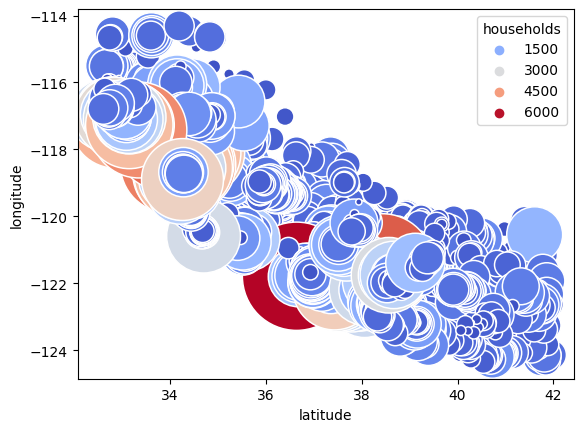

In [ ]:
import seaborn as sb

sb.scatterplot(x='latitude', y='longitude', data=datos, hue='households',
               s=datos['households'], palette='coolwarm')

In [ ]:
from sklearn.cluster import KMeans

X = datos.loc[:, ['latitude', 'longitude', 'households']]
modelo = KMeans(n_clusters=6)
predicciones = modelo.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
predicciones.shape

(20640,)

In [ ]:
X['pop_per_household'] = predicciones
X['pop_per_household'].value_counts()

2    7776
5    6452
0    4249
4    1569
1     507
3      87
Name: pop_per_household, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

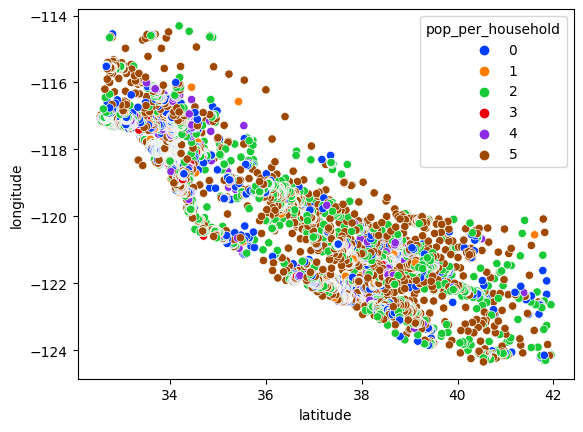

In [ ]:
import seaborn as sb
sb.scatterplot(x='latitude', y='longitude', data=X, hue='pop_per_household',
               palette='bright')

<Axes: xlabel='pop_per_household', ylabel='count'>

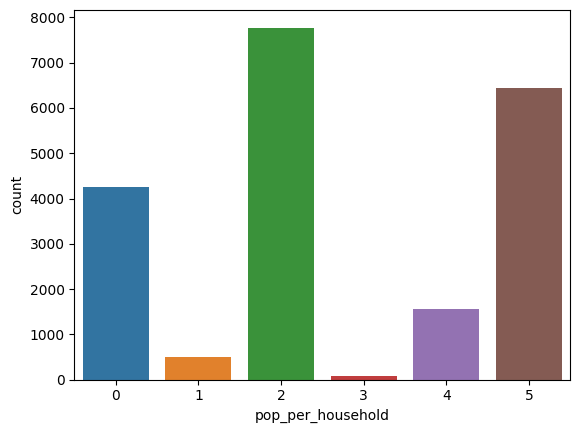

In [ ]:
sb.countplot(x='pop_per_household', data=X)

In [ ]:

X.groupby(['pop_per_household'])['households'].mean()

pop_per_household
0     671.398211
1    1777.869822
2     415.263503
3    3355.068966
4    1074.530911
5     209.148946
Name: households, dtype: float64